In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species'],categories =pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

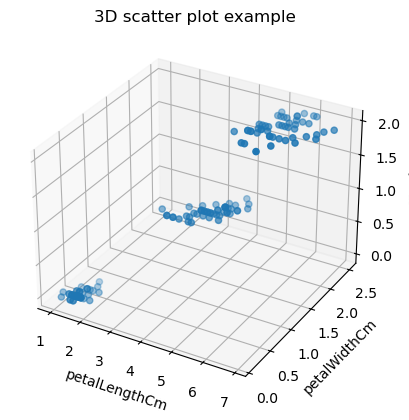

In [8]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('petalLengthCm')
ax.set_ylabel('petalWidthCm')
ax.set_zlabel('species')
plt.title('3D scatter plot example')
plt.show()

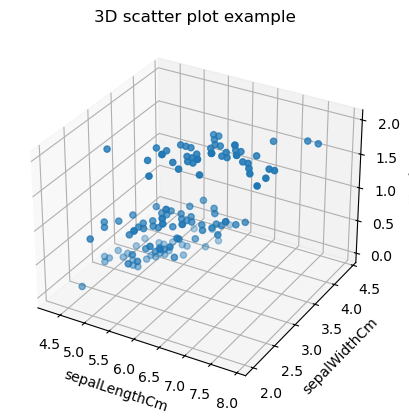

In [9]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.sepal_length,df.sepal_width,df.species)
ax.set_xlabel('sepalLengthCm')
ax.set_ylabel('sepalWidthCm')
ax.set_zlabel('species')
plt.title('3D scatter plot example')
plt.show()

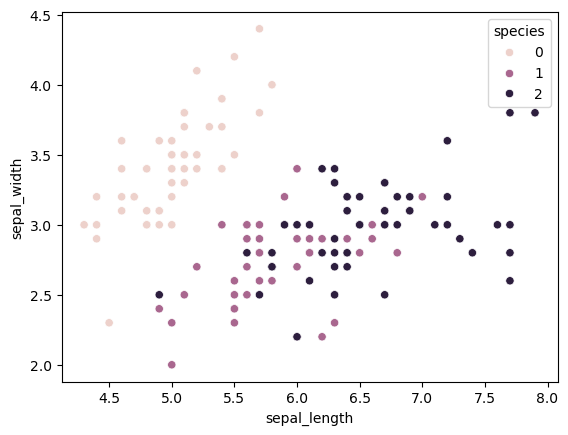

In [10]:
sns.scatterplot(data=df,x="sepal_length", y="sepal_width",hue="species");

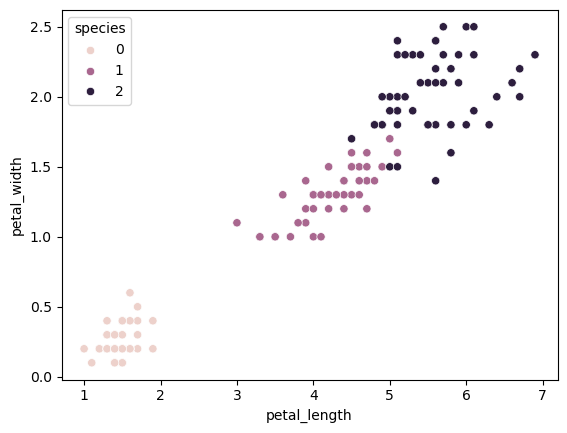

In [11]:
sns.scatterplot(data=df,x="petal_length", y="petal_width",hue="species");

In [12]:
k_rng = range(1,10)
sse=[]

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal_length','petal_width']])
    sse.append(km.inertia_)

C:\Users\sitam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sitam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sitam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sitam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [18]:
sse

[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 19.483000899685116,
 14.171085855554196,
 12.137528812974468,
 9.86719976551227,
 8.962601487206747,
 7.086442307692308]

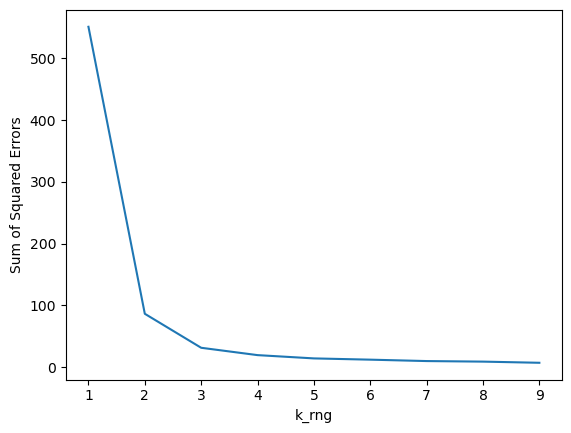

In [20]:
plt.xlabel('k_rng')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng,sse)

In [22]:
km = KMeans (n_clusters = 3, random_state=0)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

C:\Users\sitam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
df['cluster'] = y_predicted
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species,df.cluster)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]], dtype=int64)

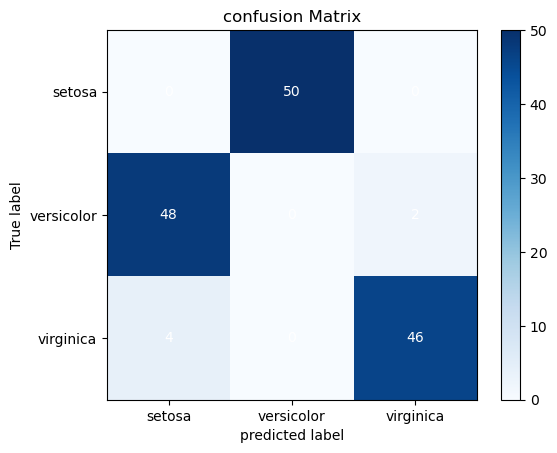

In [27]:
true_labels = df.species
predicted_labels = df.cluster
cm = confusion_matrix(true_labels,predicted_labels)
class_labels = ['setosa','versicolor','virginica']
plt.imshow(cm,interpolation = 'nearest',cmap=plt.cm.Blues)
plt.title('confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j,i,str(cm[i][j]),ha = 'center',va ='center', color  = 'white')
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.show()                 

In [29]:

x = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
x_train,x_test,y_train,y_test

(     sepal_length  sepal_width  petal_length  petal_width
 22            4.6          3.6           1.0          0.2
 15            5.7          4.4           1.5          0.4
 65            6.7          3.1           4.4          1.4
 11            4.8          3.4           1.6          0.2
 42            4.4          3.2           1.3          0.2
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [36]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =  scaler.transform(x_test)

In [41]:
x_train_scaled,x_test_scaled

(array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
        [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
        [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
        [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
        [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
        [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
        [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
        [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
        [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
        [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
        [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
        [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
        [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
        [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
        [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
        [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
        

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [45]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
y_pred = knn.predict(x_test_scaled)  

In [49]:
species_names = df['species'].unique().astype(str).tolist()
report = classification_report(y_test,y_pred,target_names=species_names)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

